# Exploratory Analysis

### Basic Libraries
- NumPy : Library for Numeric Computations in Python
- Pandas : Library for Data Acquisition and Preparation
- Matplotlib : Low-level library for Data Visualization
- Seaborn : Higher-level library for Data Visualization

In [86]:
# Basic Libraries
#NumPy : Library for Numeric Computations in Python
#Pandas : Library for Data Acquisition and Preparation
#Matplotlib : Low-level library for Data Visualization
#Seaborn : Higher-level library for Data Visualization
#Counter: for counting frequency of occurence of an item

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from collections import Counter


sb.set(palette='icefire') # set the default Seaborn style for graphics

## Import the Dataset

The dataset is in CSV format; hence we use the read_csv function from Pandas.
Immediately after importing, take a quick look at the data using the head function.

In [2]:
data_raw = pd.read_csv('./data/check1.csv')
## remove the empty column left from importing as csv
data_raw.drop('Unnamed: 0', axis=1, inplace=True)
display(data_raw.head())
data_raw.info()

,tmdb_id,imdb_id,year_film,year_ceremony,film,oscar_category,nominee,no_oscar_nominations,oscar_win,genre_id,...,casts_popularity,director,producers,screenplay,crew_popularity,budget,revenue,runtime,tmdb_vote_average,tmdb_vote_count
0,53939,tt0054326,1960,1961,Sons and Lovers,Best Actor,Trevor Howard,7,False,[18],...,21.268,Jack Cardiff,[],['Gavin Lambert'],6.253,0,0,103,6.9,18
1,22013,tt0053793,1960,1961,Elmer Gantry,Best Actor,Burt Lancaster,5,True,[18],...,39.177,Richard Brooks,['Bernard Smith'],['Richard Brooks'],15.158,3000000,10400000,146,7.2,85
2,284,tt0053604,1960,1961,The Apartment,Best Actor,Jack Lemmon,10,False,"[35, 18, 10749]",...,42.158,Billy Wilder,['Billy Wilder'],[],40.091,3000000,25000000,125,8.2,1429
3,18929,tt0053796,1960,1961,The Entertainer,Best Actor,Laurence Olivier,1,False,"[18, 10402]",...,37.900,Tony Richardson,['Harry Saltzman'],"['John Osborne', 'Nigel Kneale']",31.632,0,0,96,6.2,28
4,1908,tt0053946,1960,1961,Inherit the Wind,Best Actor,Spencer Tracy,4,False,"[18, 36]",...,73.320,Stanley Kramer,"['Stanley Kramer', 'Herman Shumlin']","['Nedrick Young', 'Harold Jacob Smith']",21.135,0,0,128,7.8,252


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdb_id               1838 non-null   int64  
 1   imdb_id               1838 non-null   object 
 2   year_film             1838 non-null   int64  
 3   year_ceremony         1838 non-null   int64  
 4   film                  1838 non-null   object 
 5   oscar_category        1838 non-null   object 
 6   nominee               1838 non-null   object 
 7   no_oscar_nominations  1838 non-null   int64  
 8   oscar_win             1838 non-null   bool   
 9   genre_id              1838 non-null   object 
 10  staring_casts         1838 non-null   object 
 11  casts_popularity      1838 non-null   float64
 12  director              1838 non-null   object 
 13  producers             1838 non-null   object 
 14  screenplay            1838 non-null   object 
 15  crew_popularity      

## Analysis of Numeric Variables

Extract the following Numeric variables from the dataset, and store as a new Pandas DataFrame.

In [3]:
#Problem 1: Analysis of Numeric Variables

#Extract the following Numeric variables from the dataset, and store as a new Pandas DataFrame.
houseNumData = pd.DataFrame(data_raw[['oscar_category', 'nominee', 'film', 'year_film']])
houseNumData.describe().round(2)

,year_film
count,1838.00
mean,1990.13
std,17.49
min,1960.00
25%,1975.00
50%,1990.00
75%,2006.00
max,2019.00


In [4]:
## taking a look at only numeric fields
data_raw_numeric = data_raw.select_dtypes(['int64','float64'])
data_raw_numeric.head()
data_raw_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdb_id               1838 non-null   int64  
 1   year_film             1838 non-null   int64  
 2   year_ceremony         1838 non-null   int64  
 3   no_oscar_nominations  1838 non-null   int64  
 4   casts_popularity      1838 non-null   float64
 5   crew_popularity       1838 non-null   float64
 6   budget                1838 non-null   int64  
 7   revenue               1838 non-null   int64  
 8   runtime               1838 non-null   int64  
 9   tmdb_vote_average     1838 non-null   float64
 10  tmdb_vote_count       1838 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 158.1 KB


<Figure size 1080x1080 with 0 Axes>

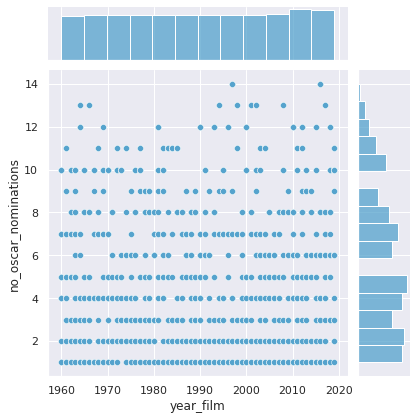

In [5]:
plt.figure(figsize=(15,15))
sb.jointplot(data=data_raw_numeric, x='year_film',y='no_oscar_nominations')

<AxesSubplot:xlabel='Count', ylabel='no_oscar_nominations'>

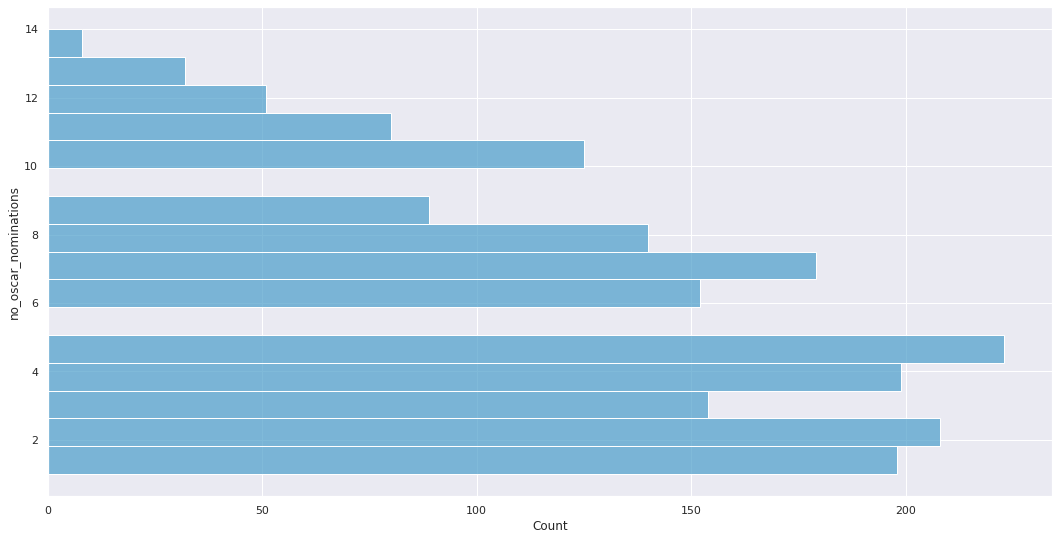

In [6]:
## looking at the overall distribution of oscars nominations
plt.figure(figsize=(18,9))
sb.histplot(data=data_raw_numeric, y='no_oscar_nominations')

<AxesSubplot:xlabel='year_film', ylabel='count'>

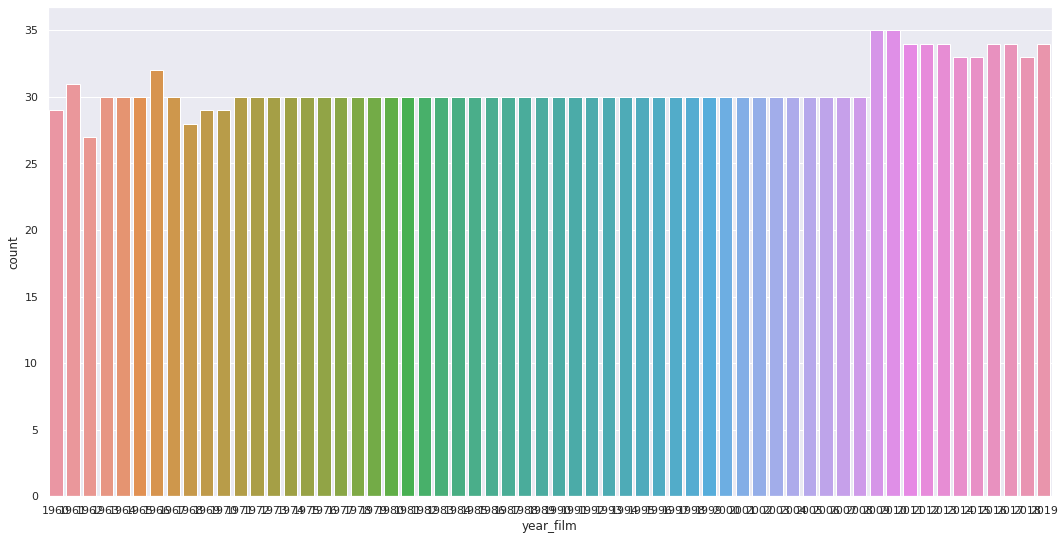

In [7]:
## looking at the nuumber of oscar candidates each year
## looks like the number of oscar candidates every year is 30, but that number has increased since 2009
plt.figure(figsize=(18,9))
#plt.annotate()
sb.countplot(data=data_raw_numeric, x='year_film')

<AxesSubplot:xlabel='no_oscar_nominations', ylabel='year_film'>

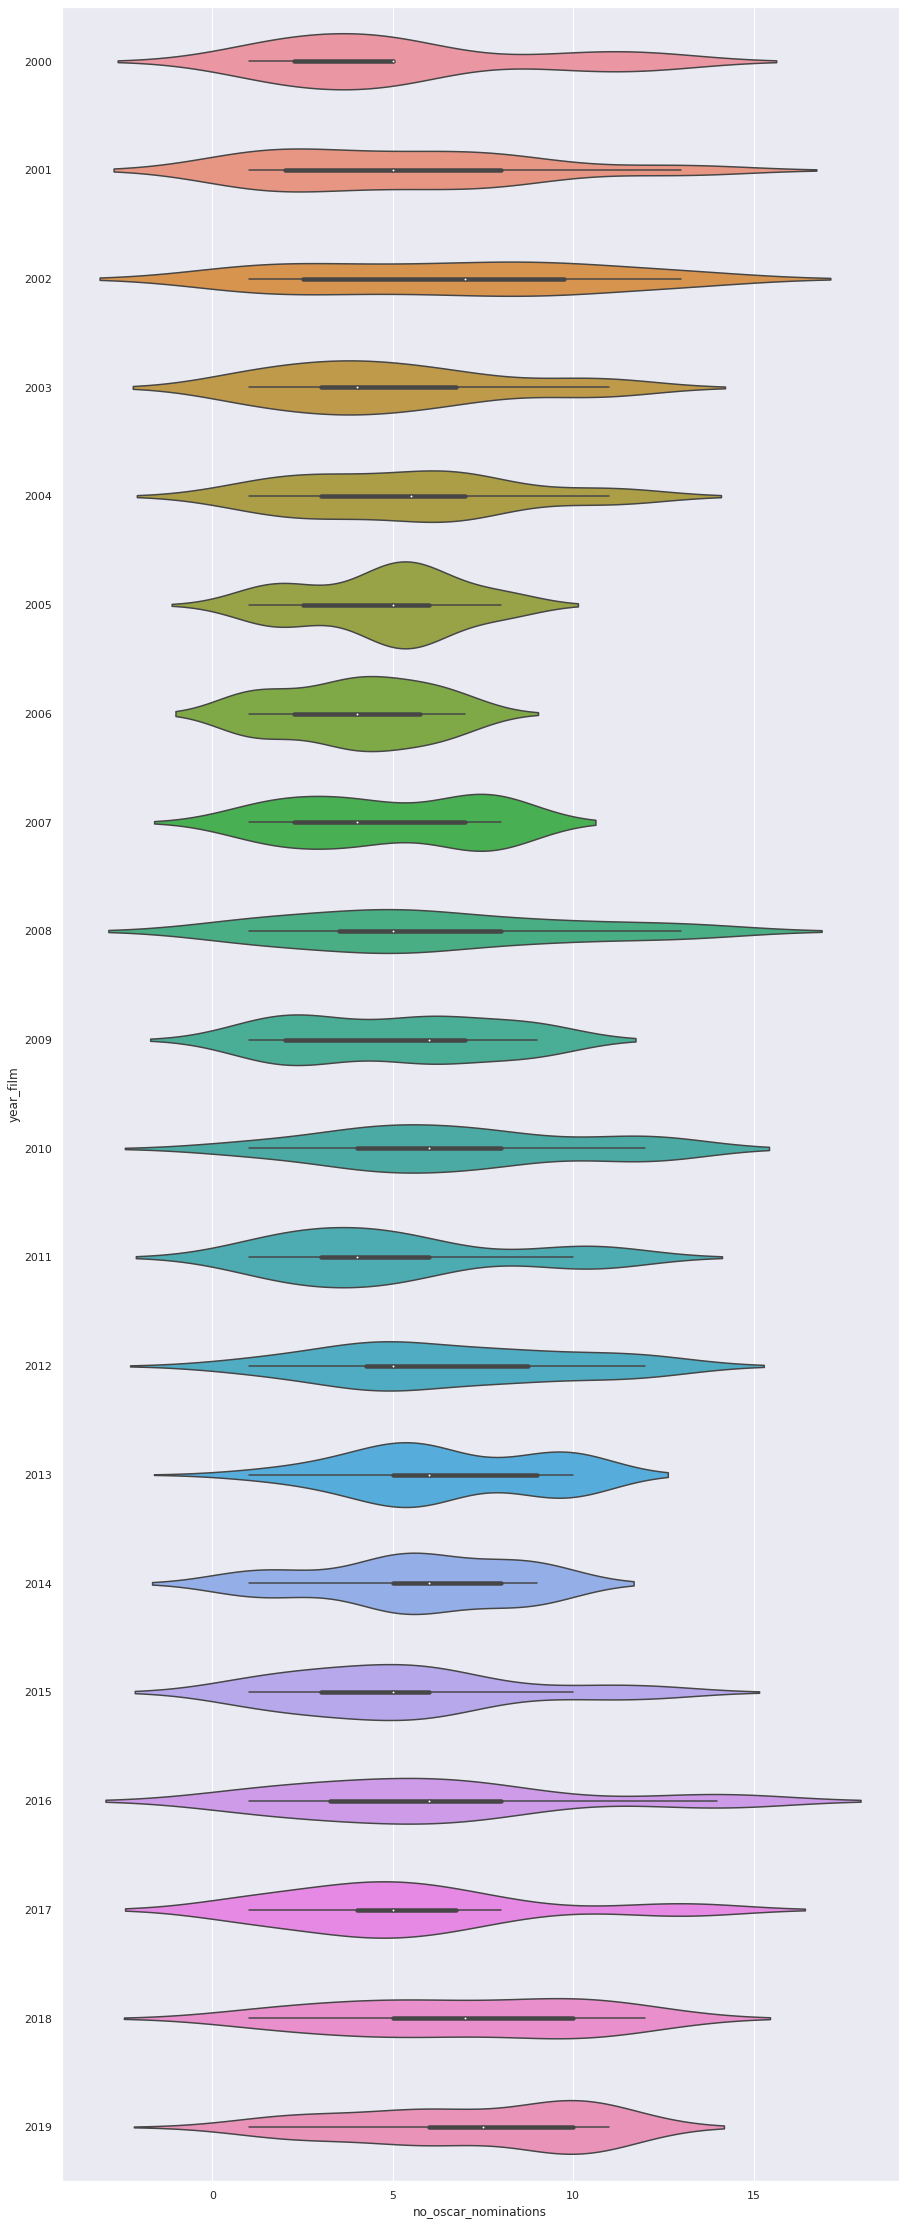

In [8]:
## looking at oscar distribution from 2000 onwards
year_oscar_20xx = data_raw[['year_film','no_oscar_nominations']]
year_oscar_20xx = year_oscar_20xx[year_oscar_20xx['year_film'] >= 2000]
plt.figure(figsize=(15,40))
sb.violinplot(data=year_oscar_20xx, y='year_film', x='no_oscar_nominations',orient='h')

<AxesSubplot:xlabel='casts_popularity', ylabel='oscar_category'>

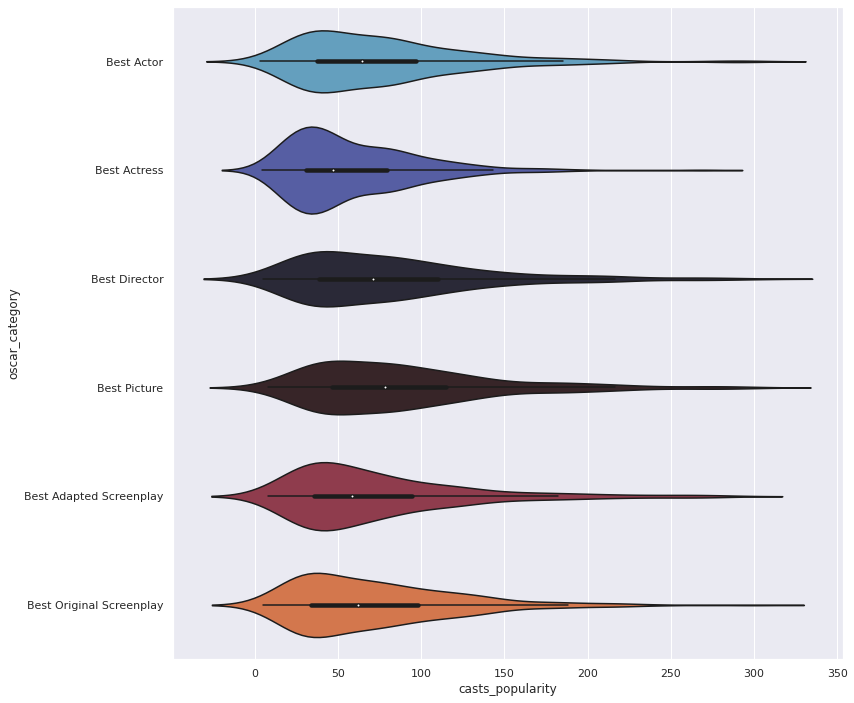

In [9]:
## looking at number of oscar categories
plt.figure(figsize=(12,12))
sb.violinplot(data=data_raw, y='oscar_category', x='casts_popularity',orient='h')

In [10]:
data_raw['genre_id'].fillna('')
data_raw_genre_temp = data_raw.copy(deep=True)
## converts the string representation of list into a list
## takes the first element of that list as default genre
## this action is TEMP!!
for x in range(len(data_raw)):
    ## only a single element in string represtation of list
    if ','  not in data_raw['genre_id'][x].strip("[]"):
        data_raw_genre_temp['genre_id'][x] = data_raw['genre_id'][x].strip("[]")
    else:
        data_raw_genre_temp['genre_id'][x] = data_raw['genre_id'][x].strip("[]").split(', ')[0]

data_raw_genre_temp.head()

/home/jr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,tmdb_id,imdb_id,year_film,year_ceremony,film,oscar_category,nominee,no_oscar_nominations,oscar_win,genre_id,...,casts_popularity,director,producers,screenplay,crew_popularity,budget,revenue,runtime,tmdb_vote_average,tmdb_vote_count
0,53939,tt0054326,1960,1961,Sons and Lovers,Best Actor,Trevor Howard,7,False,18,...,21.268,Jack Cardiff,[],['Gavin Lambert'],6.253,0,0,103,6.9,18
1,22013,tt0053793,1960,1961,Elmer Gantry,Best Actor,Burt Lancaster,5,True,18,...,39.177,Richard Brooks,['Bernard Smith'],['Richard Brooks'],15.158,3000000,10400000,146,7.2,85
2,284,tt0053604,1960,1961,The Apartment,Best Actor,Jack Lemmon,10,False,35,...,42.158,Billy Wilder,['Billy Wilder'],[],40.091,3000000,25000000,125,8.2,1429
3,18929,tt0053796,1960,1961,The Entertainer,Best Actor,Laurence Olivier,1,False,18,...,37.900,Tony Richardson,['Harry Saltzman'],"['John Osborne', 'Nigel Kneale']",31.632,0,0,96,6.2,28
4,1908,tt0053946,1960,1961,Inherit the Wind,Best Actor,Spencer Tracy,4,False,18,...,73.320,Stanley Kramer,"['Stanley Kramer', 'Herman Shumlin']","['Nedrick Young', 'Harold Jacob Smith']",21.135,0,0,128,7.8,252


In [24]:
## converts the string representation of list into a list ONlY
## different dataframe name: this one is data_raw_genre
data_raw_genre = data_raw.copy(deep=True)

for x in range(len(data_raw)):
    ## only a single element in string represtation of list
    if ','  not in data_raw['genre_id'][x].strip("[]"):
        data_raw_genre['genre_id'][x] = data_raw['genre_id'][x].strip("[]").split()
    else:
        data_raw_genre['genre_id'][x] = data_raw['genre_id'][x].strip("[]").split(', ')

/home/jr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [92]:
## extract only oscar winning entries from the dataframe
data_oscar = data_raw[data_raw['oscar_win']==True].reset_index(drop=True)

In [106]:
## List of oscar categories
oscar_cat = ['Best Actor',
             'Best Actress',
             'Best Director',
             'Best Picture',
             'Best Adapted Screenplay',
             'Best Original Screenplay']

def translate_genre_id(g):
    for i in range(0,len(g)):
        if g[i] == '28':
            g[i] = 'Action'
        elif g[i] == '12':
            g[i] = 'Adventure'
        elif g[i] == '16':
            g[i] = 'Animation'
        elif g[i] == '35':
            g[i] = 'Comedy'
        elif g[i] == '80':
            g[i] = 'Crime'
        elif g[i] == '99':
            g[i] = 'Documentary'
        elif g[i] == '18':
            g[i] = 'Drama'
        elif g[i] == '10751':
            g[i] = 'Family'
        elif g[i] == '14':
            g[i] = 'Fantasy'
        elif g[i] == '36':
            g[i] = 'History'
        elif g[i] == '27':
            g[i] = 'Horror'
        elif g[i] == '10402':
            g[i] = 'Music'
        elif g[i] == '9648':
            g[i] = 'Mystery'
        elif g[i] == '10749':
            g[i] = 'Romance'
        elif g[i] == '878':
            g[i] = 'Science Fiction'
        elif g[i] == '10770':
            g[i] = 'TV Movie'
        elif g[i] == '53':
            g[i] = 'Thriller'
        elif g[i] == '10752':
            g[i] = 'War'
        elif g[i] == '37':
            g[i] = 'Western'
    return g

In [104]:
## we are making a dictionary of dataframes 
oscar_cat_genre = {}

for cat in oscar_cat:
    genre_list = []
    sub_oscar_cat = data_oscar[data_oscar['oscar_category']==cat]
    
    ## adds the genre id to genre_list for THAT PARTICULAR OSCAR CATEGORY
    for row in range(len(sub_oscar_cat)):
        for i in data_raw_genre['genre_id'][row]:
            genre_list.append(i)
    
    genre_count = pd.DataFrame.from_dict(Counter(genre_list),orient='index').reset_index()
    genre_count = genre_count.rename(columns={'index':'genre_id',0:'count'}).sort_values(['count']).reset_index(drop=True)

    oscar_cat_genre[cat] = genre_count

#oscar_cat_genre

In [116]:
genre_list = []
#for line in data_raw_genre:
#    if line['oscar_win']==True:
#        genre_list.append(data_raw_genre['genre_id'])
for row in range(len(data_raw_genre)):
    if data_raw_genre['oscar_win'][row]:
        for i in data_raw_genre['genre_id'][row]:
            genre_list.append(i)
        #genre_list.append(i for i in data_raw_genre['genre_id'])
        
## collecting occurences of genre types that have oscar wins
## there may be more than one genre per movie
genre_count = pd.DataFrame.from_dict(Counter(genre_list),orient='index').reset_index()
genre_count = genre_count.rename(columns={'index':'genre_id',0:'count'}).sort_values(['count']).reset_index(drop=True)
#translate_genre_id(genre_count['genre_id'])


0     Science Fiction
1              Family
2             Fantasy
3              Horror
4             Mystery
5             Western
6              Action
7           Adventure
8               Music
9                 War
10           Thriller
11              Crime
12            History
13             Comedy
14            Romance
15              Drama
Name: genre_id, dtype: object